<a href="https://colab.research.google.com/github/HecticCoder/app/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GATHERING DATA


In [2]:
!pip install bing-image-downloader

In [3]:
!mkdir images


In [5]:
from bing_image_downloader import downloader
downloader.download("car",limit=60,output_dir= 'images',adult_filter_off= True )
from bing_image_downloader import downloader
downloader.download("motorcycle",limit=60,output_dir= 'images',adult_filter_off= True )
from bing_image_downloader import downloader
downloader.download("helicopter",limit=60,output_dir= 'images',adult_filter_off= True )



[!!]Indexing page: 1

[%] Indexed 60 Images on Page 1.


[%] Downloading Image #1 from https://www.hdnicewallpapers.com/Walls/Big/Chevrolet/2018_New_Launch_Chevrolet_Camaro_SS_Car.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://wallup.net/wp-content/uploads/2016/03/12/331857-Infiniti_Q60-tuning-car-vehicle-street.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://s3.caradvice.com.au/wp-content/uploads/2016/03/apollo-arrow-hero.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://s1.cdn.autoevolution.com/images/news/gallery/lamborghini-veneno-named-worlds-most-ugliest-car_10.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://s3.caradvice.com.au/wp-content/uploads/2013/10/Ferrari-F12-Berlinetta.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://s3.caradvice.com.au/wp-content/uploads/2011/12/Madagascar_Orange015.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://s3.caradvice.com.au/wp-content/uploads/2016/

PREPROCESSING

1. Resizing the image data
2. Flattening the image data

In [6]:
# converting matrix to vector - flatten()
# since images can't be processed directly as they are in form of matrxi(3D), flatten data(2D) is passed.

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []
datadir = '/content/images'
categories = ['car','helicopter','motorcycle']
for category in categories:
  class_num = categories.index(category) # label encoding the values by assigning them their index value
  path = os.path.join(datadir,category) 
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array)
    #print(img_array.shape)
    img_resize = resize(img_array,(150,150,3)) # resizing # skimage normalizes the values from 0 to 1
    flat_data.append(img_resize.flatten()) # flattening 
    images.append(img_resize)
    target.append(class_num)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

 

In [10]:
flat_data

array([[0.15281046, 0.16849673, 0.20379085, ..., 0.40771242, 0.43124183,
        0.42339869],
       [0.86993464, 0.86993464, 0.86993464, ..., 0.82269281, 0.81484967,
        0.81877124],
       [0.        , 0.        , 0.        , ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.32262745, 0.30301961, 0.2912549 , ..., 0.57500654, 0.57500654,
        0.57500654],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [11]:
len(flat_data[0])

67500

In [12]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

<function matplotlib.pyplot.show>

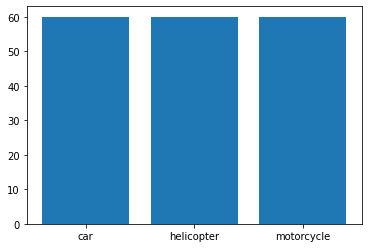

In [13]:
unique,count = np.unique(target,return_counts = True) 
plt.bar(categories,count)
plt.show

SPLITTING DATA INTO TRAINING AND TESTING DATA

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.3,random_state = 120)


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
para_grid = [
             {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
# using GridSearchCV
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,para_grid)
clf.fit(x_train,y_train)
clf.best_params_



{'C': 1, 'kernel': 'linear'}

In [17]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 2, 1, 0, 1])

In [18]:
y_test

array([2, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 2, 1])

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred, y_test)


0.7777777777777778

In [20]:
confusion_matrix(y_pred,y_test)

array([[15,  5,  5],
       [ 0, 16,  0],
       [ 2,  0, 11]])

In [21]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.60      0.71        25
           1       0.76      1.00      0.86        16
           2       0.69      0.85      0.76        13

    accuracy                           0.78        54
   macro avg       0.78      0.82      0.78        54
weighted avg       0.80      0.78      0.77        54



In [22]:
# saving the model using pickle library
import pickle
pickle.dump(clf,open('image_model.p','wb')) 


In [23]:
# now we can easily load our model
model = pickle.load(open('image_model.p','rb'))  
model

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

enter the url for the imagehttps://i.ytimg.com/vi/q11eMGe9QYM/maxresdefault.jpg
(720, 1280, 3)
predicted output: helicopter


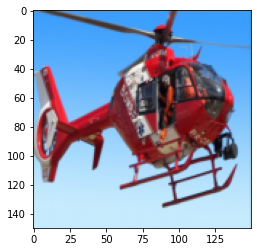

In [24]:
flat_data = []
input_image = input('enter the url for the image') 
img = imread(input_image)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten()) 
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'predicted output: {y_out}')



DEPLOYEMENT


In [25]:
!pip install streamlit


     |████████████████████████████████| 7.5MB 7.7MB/s 
     |████████████████████████████████| 112kB 43.5MB/s 
     |████████████████████████████████| 4.6MB 37.2MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 163kB 42.3MB/s 
     |████████████████████████████████| 122kB 43.5MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=1d4c420858e2b2daa2a2dbff30f94a6604d6f14f60b5a1c0a45cd79ed500dbd4
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


In [26]:
!pip install pyngrok==4.1.1
from pyngrok import ngrok

  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=9710d3ed9722764718bd3082f855886154459b0d9cc6df9a675dc1a59b00d661
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [29]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image

st.title('IMAGE CLASSIFIER')
st.text('Upload the image')
model = pickle.load(open('image_model.p','rb'))
uploaded_file = st.file_uploader('Choose an image....',type='jpg')

if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption = 'Uploaded image')

if st.button('PREDICT'):
  categories = ['car','helicopter','motorcycle']
  st.write('Result....')
  flat_data = []
  img = np.array(img)
  img_resize = resize(img,(150,150,3))
  flat_data.append(img_resize.flatten()) 
  flat_data = np.array(flat_data)
  st.write(img.shape)
  y_out = model.predict(flat_data)
  y_out = categories[y_out[0]]
  st.title(f'Predicted output:   {y_out}')
  q = model.predict_proba(flat_data)
  for index, item in enumerate(categories):
    st.write(f'{item} : {q[0][index]*100}%')


Overwriting app.py


In [28]:
!nohup streamlit run app.py &

public_url = ngrok.connect(port='8501')
print(public_url)

nohup: appending output to 'nohup.out'
http://c7c83cf18b09.ngrok.io
